In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset





In [5]:
#Load Dataset
df_ebola = pd.read_csv("/content/ebola_2014_2016_clean.csv")
# Inspect
print(df_ebola.head())
print(df_ebola.columns)

        Country        Date  \
0        Guinea  2014-08-29   
1       Nigeria  2014-08-29   
2  Sierra Leone  2014-08-29   
3       Liberia  2014-08-29   
4  Sierra Leone  2014-09-05   

   Cumulative no. of confirmed, probable and suspected cases  \
0                                              648.0           
1                                               19.0           
2                                             1026.0           
3                                             1378.0           
4                                             1261.0           

   Cumulative no. of confirmed, probable and suspected deaths  
0                                              430.0           
1                                                7.0           
2                                              422.0           
3                                              694.0           
4                                              491.0           
Index(['Country', 'Date',
       'Cumulative

In [6]:
# Rename long column names
df_ebola = df_ebola.rename(columns={
    "Cumulative no. of confirmed, probable and suspected cases": "Cumulative_cases",
    "Cumulative no. of confirmed, probable and suspected deaths": "Cumulative_deaths"
})

In [7]:
# Convert Date
df_ebola["Date"] = pd.to_datetime(df_ebola["Date"], errors="coerce")

# Sort by Country + Date
df_ebola = df_ebola.sort_values(["Country", "Date"])

# Final trimmed dataframe
df_ebola_trimmed = df_ebola[["Country", "Date", "Cumulative_cases", "Cumulative_deaths"]]

print(df_ebola_trimmed.head())

   Country       Date  Cumulative_cases  Cumulative_deaths
0   Guinea 2014-08-29             648.0              430.0
7   Guinea 2014-09-05             812.0              517.0
10  Guinea 2014-09-08             862.0              555.0
14  Guinea 2014-09-12             861.0              557.0
21  Guinea 2014-09-16             936.0              595.0


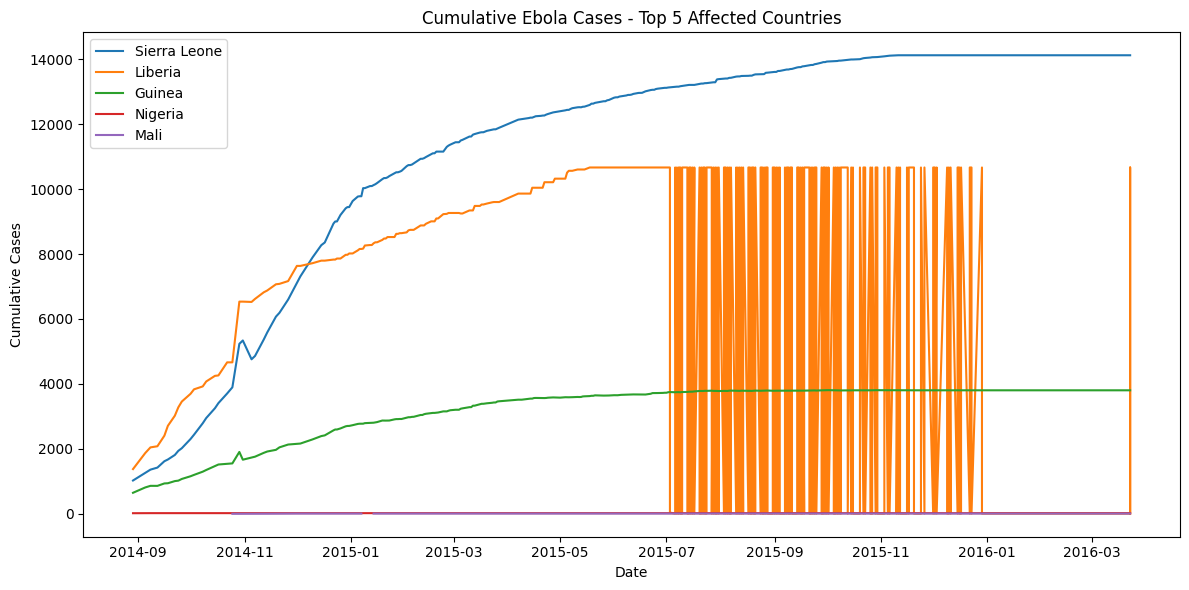

In [8]:
#Line plots for top 5 countries (by cumulative cases)

top5_countries = (
    df_ebola_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top5 = df_ebola_trimmed[df_ebola_trimmed["Country"].isin(top5_countries)]

plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date"], country_data["Cumulative_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Ebola Cases - Top 5 Affected Countries")
plt.legend()
plt.tight_layout()
plt.show()


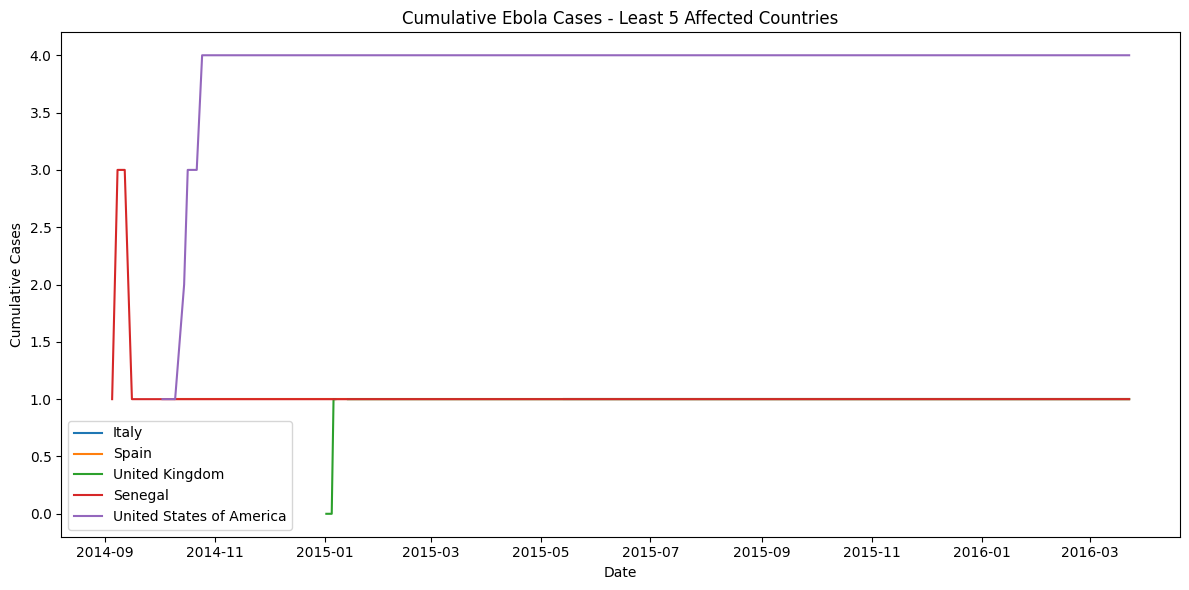

In [9]:
#Line plots for least 5 affected countries

least5 = (
    df_ebola_trimmed.groupby('Country')["Cumulative_cases"]
    .max()
    .sort_values(ascending=True)
    .head(5)
    .index
)

least5_data = df_ebola_trimmed[df_ebola_trimmed["Country"].isin(least5)]

plt.figure(figsize=(12,6))
for country in least5:
    country_data = least5_data[least5_data["Country"] == country]
    plt.plot(country_data["Date"], country_data["Cumulative_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("Cumulative Ebola Cases - Least 5 Affected Countries")
plt.legend()
plt.tight_layout()
plt.show()

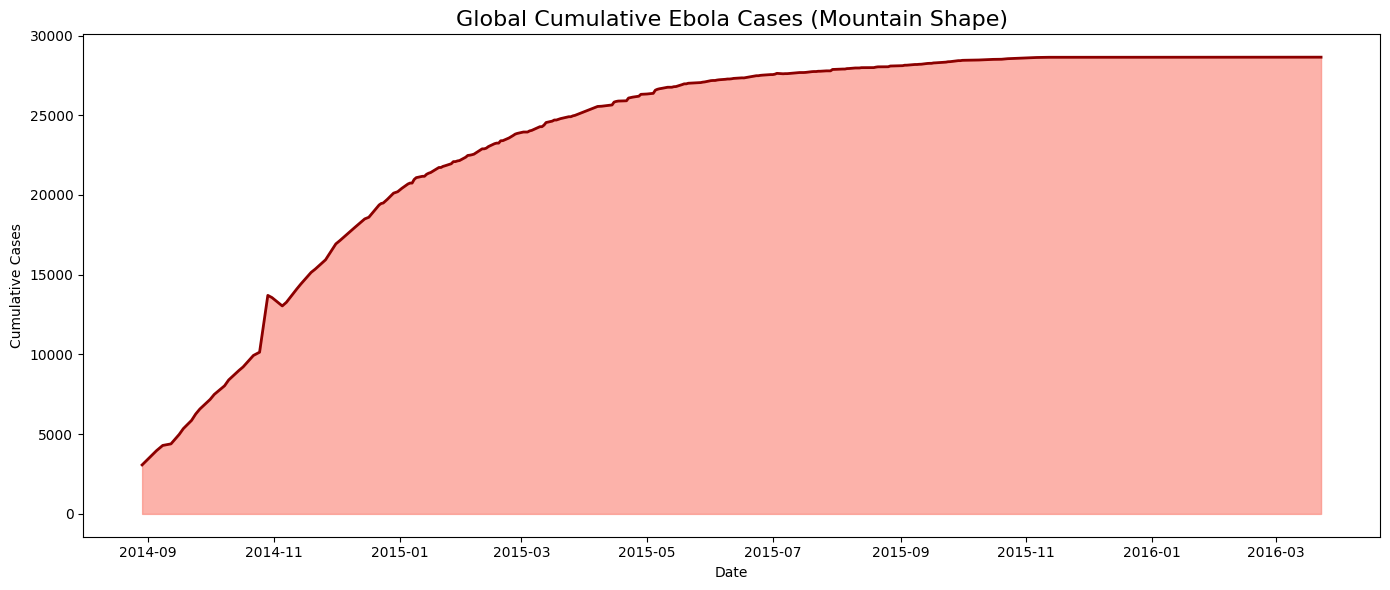

In [10]:

# 4. Global Cumulative Cases (Mountain Shape)

global_cases = df_ebola_trimmed.groupby("Date")["Cumulative_cases"].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(global_cases["Date"], global_cases["Cumulative_cases"], color="darkred", linewidth=2)
plt.fill_between(global_cases["Date"], global_cases["Cumulative_cases"], color="salmon", alpha=0.6)
plt.title("Global Cumulative Ebola Cases (Mountain Shape)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.tight_layout()
plt.show()


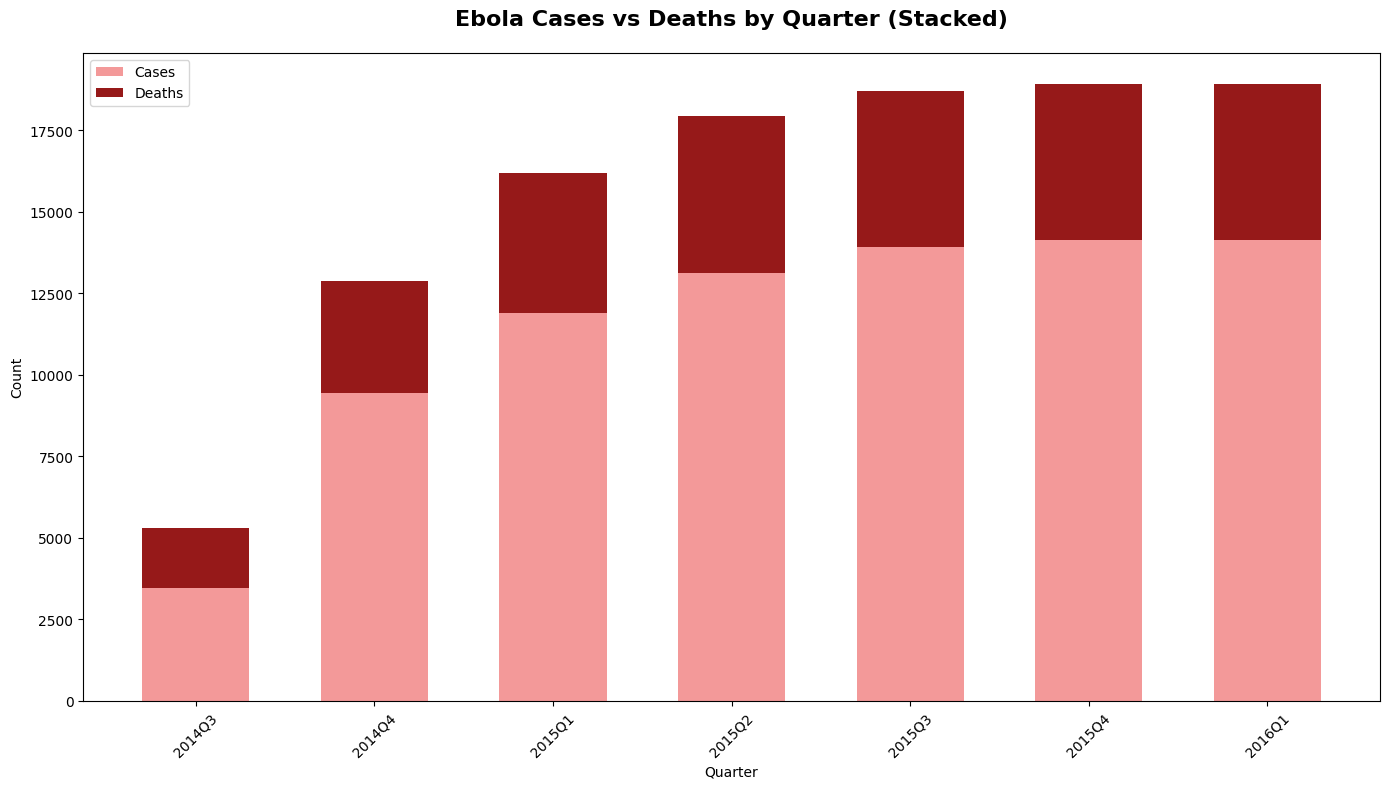

In [11]:

#Quarterly Cases vs Deaths (Stacked Bar)

df_copy = df_ebola_trimmed.copy()
df_copy["Quarter"] = df_copy["Date"].dt.to_period("Q")

quarterly_data = df_copy.groupby("Quarter").agg({"Cumulative_cases":"max","Cumulative_deaths":"max"}).reset_index()
quarterly_data["Quarter_str"] = quarterly_data["Quarter"].astype(str)

fig, ax = plt.subplots(figsize=(14,8))
width = 0.6
ax.bar(quarterly_data["Quarter_str"], quarterly_data["Cumulative_cases"], width, label="Cases", color="lightcoral", alpha=0.8)
ax.bar(quarterly_data["Quarter_str"], quarterly_data["Cumulative_deaths"], width, bottom=quarterly_data["Cumulative_cases"], label="Deaths", color="darkred", alpha=0.9)

ax.set_title("Ebola Cases vs Deaths by Quarter (Stacked)", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Quarter")
ax.set_ylabel("Count")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


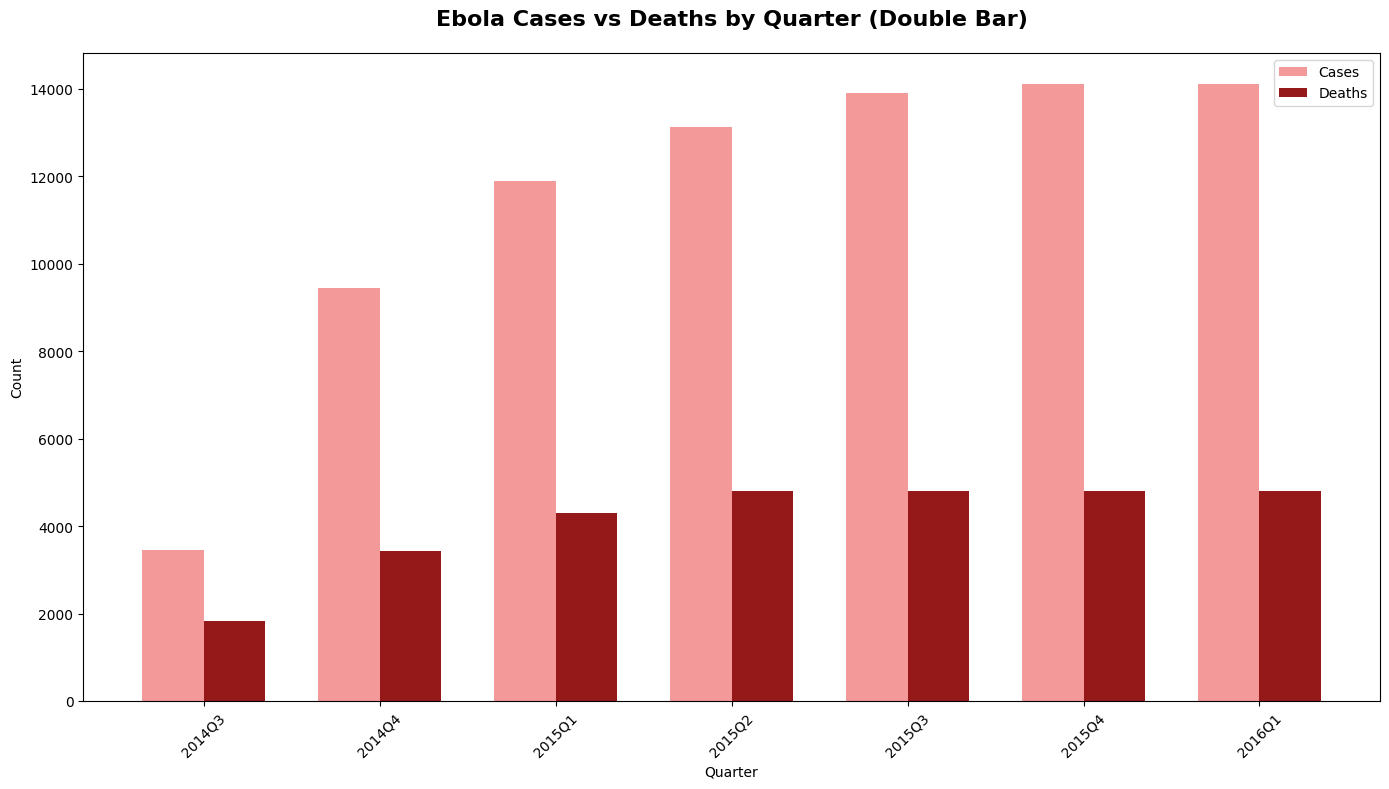

In [12]:

# 6. Quarterly Cases vs Deaths (Double Bar)

x = np.arange(len(quarterly_data["Quarter_str"]))
width = 0.35

fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x - width/2, quarterly_data["Cumulative_cases"], width, label="Cases", color="lightcoral", alpha=0.8)
ax.bar(x + width/2, quarterly_data["Cumulative_deaths"], width, label="Deaths", color="darkred", alpha=0.9)

ax.set_title("Ebola Cases vs Deaths by Quarter (Double Bar)", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("Quarter")
ax.set_ylabel("Count")
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data["Quarter_str"], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

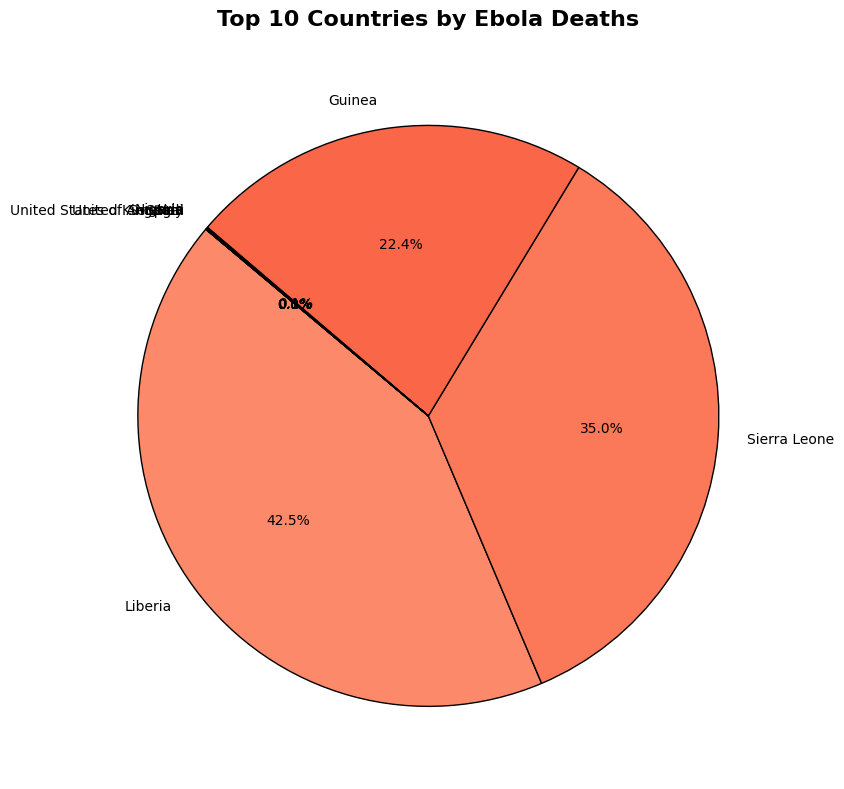

In [13]:

#Top 10 Countries by Deaths (Pie Chart)

country_deaths = df_ebola_trimmed.groupby("Country")["Cumulative_deaths"].max().reset_index()
top10_deaths = country_deaths.sort_values("Cumulative_deaths", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(top10_deaths["Cumulative_deaths"], labels=top10_deaths["Country"], autopct="%1.1f%%",
       startangle=140, colors=plt.cm.Reds(np.linspace(0.4, 0.9, 10)),
       wedgeprops={"edgecolor":"black"})
ax.set_title("Top 10 Countries by Ebola Deaths", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

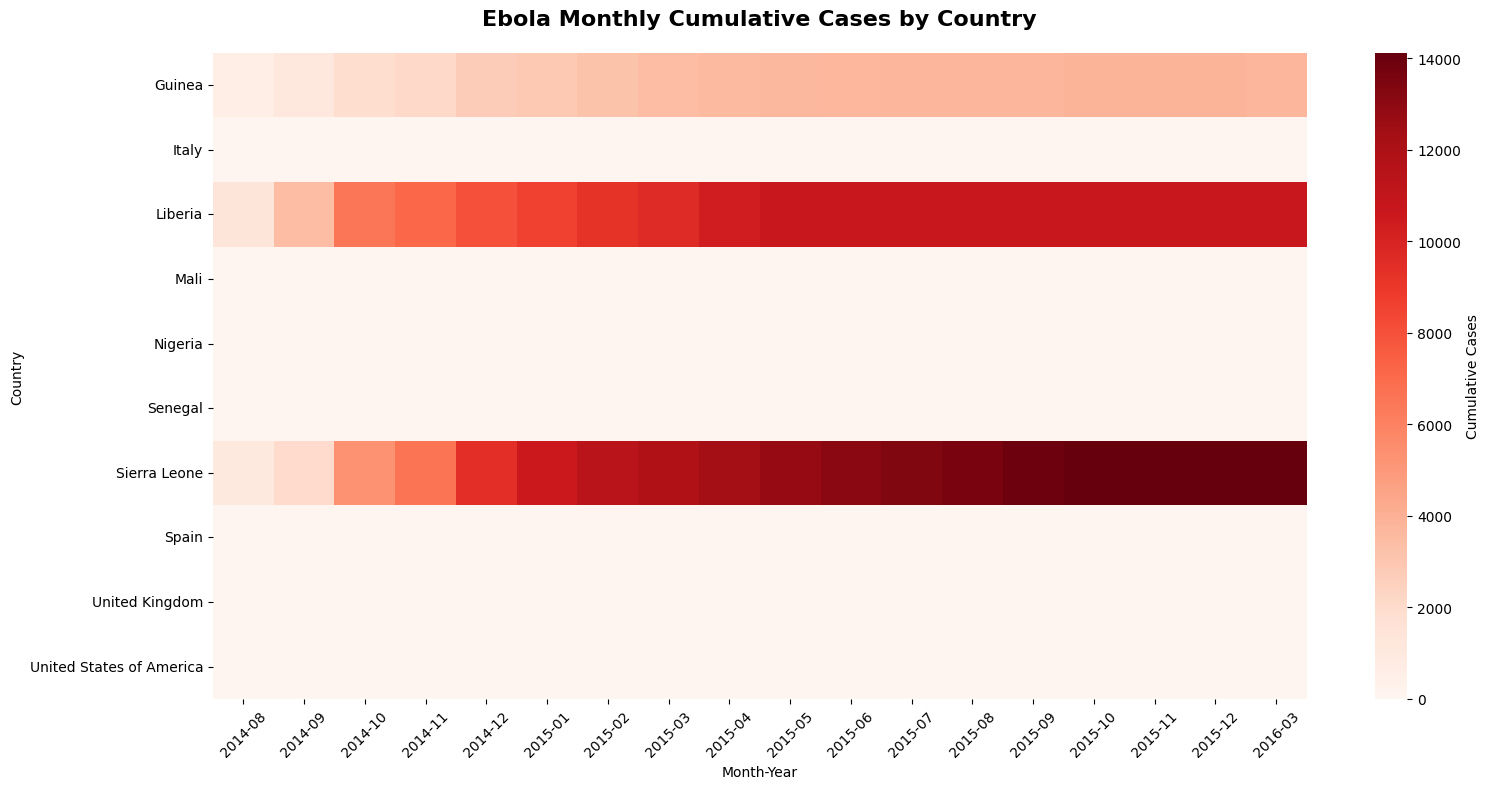

In [14]:

#Heatmap (Monthly Cases by Country)

df_monthly = df_ebola_trimmed.copy()
df_monthly["Month_Year"] = df_monthly["Date"].dt.to_period("M")

heatmap_data = df_monthly.groupby(["Country","Month_Year"])["Cumulative_cases"].max().reset_index()
heatmap_pivot = heatmap_data.pivot(index="Country", columns="Month_Year", values="Cumulative_cases").fillna(0)

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_pivot, cmap="Reds", cbar_kws={"label":"Cumulative Cases"})
plt.title("Ebola Monthly Cumulative Cases by Country", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Month-Year")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:

#Interactive Plots (Plotly)

# Global cumulative cases line
fig_cases = px.line(df_ebola_trimmed.groupby("Date", as_index=False).sum(), x="Date", y="Cumulative_cases", title="Global Cumulative Ebola Cases Over Time")

# Global cumulative deaths line
fig_deaths = px.line(df_ebola_trimmed.groupby("Date", as_index=False).sum(), x="Date", y="Cumulative_deaths",
                     title="Global Cumulative Ebola Deaths Over Time", color_discrete_sequence=["red"])

# Stacked bar by Country
country_grouped = df_ebola_trimmed.groupby(["Date","Country"], as_index=False)[["Cumulative_cases","Cumulative_deaths"]].max()
fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(x=country_grouped["Date"], y=country_grouped["Cumulative_cases"], name="Cases", marker_color="blue"))
fig_stacked.add_trace(go.Bar(x=country_grouped["Date"], y=country_grouped["Cumulative_deaths"], name="Deaths", marker_color="red"))
fig_stacked.update_layout(barmode="stack", title="Ebola Cases vs Deaths (Stacked by Country)", xaxis_title="Date", yaxis_title="Count")

# Choropleth map (Total Cases)
country_grouped_cases = df_ebola_trimmed.groupby("Country", as_index=False)["Cumulative_cases"].max()
fig_map = px.choropleth(country_grouped_cases, locations="Country", locationmode="country names",
                        color="Cumulative_cases", hover_name="Country", color_continuous_scale="Viridis",
                        title="Ebola Outbreak (2014-2016): Total Cases by Country")

# Show interactive
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()